<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(18, 135, 198); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents </b></h3>
    
- I. Crawling Data and Merging Datasets
- II. Exploring and Pre-processing Data
    - [2.1. Basic infomation](#2.1)
        - [2.1.1. Shape of data](#2.1.1)
        - [2.1.2. Meaning of each row](#2.1.2)
        - [2.1.3. Meaning of each column](#2.1.3)
        - [2.1.4. Check duplicate](#2.1.4)
        - [2.1.5. Data type of each column (standardize if necessary)](#2.1.5)
        - [2.1.6. Missing values of each column](#2.1.6)
    - [2.2 Data distribution](#2.2)
    - [2.3. Abnormal values and outliers](#2.3)
    - [2.4. Correlation between variables](#2.4)
- III. Asking meaningful questions
    - [3.1. Question 1](#3.1)
        - [3.1.1. Preprocessing](#3.1.1)
        - [3.1.2. Analysis](#3.1.2)
        - [3.1.3. Conclusion](#3.1.3)
    - [3.2. Question 2](#3.2)
        - [3.2.1. Preprocessing](#3.2.1)
        - [3.2.2. Analysis](#3.2.2)
        - [3.2.3. Conclusion](#3.2.3)
    - [3.3. Question 3](#3.3)
        - [3.3.1. Preprocessing](#3.3.1)
        - [3.3.2. Analysis](#3.3.2)
        - [3.3.3. Conclusion](#3.3.3)

    - [3.4. Question 4](#3.4)
        - [3.4.1. Preprocessing](#3.4.1)
        - [3.4.2. Analysis](#3.4.2)
        - [3.4.3. Conclusion](#3.4.3)
    - [3.5. Question 5](#3.5)
        - [3.5.1. Preprocessing](#3.5.1)
        - [3.5.2. Analysis](#3.5.2)
        - [3.5.3. Conclusion](#3.5.3)
    - [3.6. Question 6](#3.6)
        - [3.6.1. Preprocessing](#3.6.1)
        - [3.6.2. Analysis](#3.6.2)
        - [3.6.3. Conclusion](#3.6.3)
- IV. References

In [2]:
from IPython.display import display
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import os

import urllib.robotparser

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(2, 100, 153); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1. Crawling Data and Merging Datasets </b></h3>

<a class="anchor" id="1.1."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.1. Helper functions </b></h4>

In [4]:
BASE_URL = 'http://api.worldbank.org/v2/'

INDICATOR_CODES = [
    "SP.POP.TOTL",
    "SP.POP.TOTL.FE.IN",
    "SP.POP.TOTL.MA.IN",
    "SP.DYN.CBRT.IN",
    "SP.DYN.CDRT.IN",
    "SE.COM.DURS",
    "SL.IND.EMPL.ZS",
    "SL.AGR.EMPL.ZS",
    "SL.SRV.EMPL.ZS",
    "SL.AGR.EMPL.FE.ZS",
    "SL.IND.EMPL.FE.ZS",
    "SL.SRV.EMPL.FE.ZS",
    "SL.UEM.TOTL.ZS",
    "SL.UEM.TOTL.FE.ZS",
    "NY.GDP.MKTP.CD",
    "NY.ADJ.NNTY.PC.KD.ZG",
    "NY.GSR.NFCY.CD",
    "NV.AGR.TOTL.CD",
    "NV.AGR.TOTL.ZS",
    "NV.IND.TOTL.ZS",
    "NV.SRV.TOTL.ZS",
    "GC.XPN.TOTL.GD.ZS",
    "NY.GDP.PCAP.CD",
    "NY.GDP.MKTP.KD.ZG",
    "BX.KLT.DINV.CD.WD",
    "NE.EXP.GNFS.ZS",
    "NE.IMP.GNFS.ZS",
    "SP.DYN.LE00.MA.IN",
    "SP.DYN.LE00.FE.IN",
    "FP.CPI.TOTL.ZG",
]

features_mapping = {
    "SP.POP.TOTL": "Total Population",
    "SP.POP.TOTL.FE.IN": "Female Population",
    "SP.POP.TOTL.MA.IN": "Male Population",
    "SP.DYN.CBRT.IN": "Birth Rate",
    "SP.DYN.CDRT.IN": "Death Rate",
    "SE.COM.DURS": "Compulsory Education Dur.",
    "SL.IND.EMPL.ZS": "Employment in Industry(%)",
    "SL.AGR.EMPL.ZS": "Employment in Agriculture(%)",
    "SL.SRV.EMPL.ZS": "Employment in Services(%)",
    "SL.AGR.EMPL.FE.ZS": "Female Employment in Agriculture(%)",
    "SL.IND.EMPL.FE.ZS": "Female Employment in Industry(%)",
    "SL.SRV.EMPL.FE.ZS" : "Female Employment in Services(%)",
    "SL.UEM.TOTL.ZS": "Unemployment(%)",
    "SL.UEM.TOTL.FE.ZS" : "Female Unemployment(%)",
    "NY.GDP.MKTP.CD": "GDP in USD",
    "NY.ADJ.NNTY.PC.KD.ZG": "National Income per Capita",
    "NY.GSR.NFCY.CD": "Net income from Abroad",
    "NV.AGR.TOTL.CD": "Agriculture value added(in USD)",
    "NV.AGR.TOTL.ZS" : "Agriculture value added(%)",
    "NV.IND.TOTL.ZS" : "Industry value added(%)",
    "NV.SRV.TOTL.ZS" : "Services value added(%)",
    "GC.XPN.TOTL.GD.ZS" : "Expense(% of GDP)",
    "NY.GDP.PCAP.CD": "GDP per capita",
    "NY.GDP.MKTP.KD.ZG": "GDP growth rate",
    "BX.KLT.DINV.CD.WD": "Foreign Direct Investment",
    "NE.EXP.GNFS.ZS": "Exports of goods and services",
    "NE.IMP.GNFS.ZS": "Imports of goods and services",
    "SP.DYN.LE00.MA.IN": "Male life expectancy",
    "SP.DYN.LE00.FE.IN": "Female life expectancy",
    "FP.CPI.TOTL.ZG" : "Inflation rate",
}

In [5]:
def loadData(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022') -> List:
    result_data = []
    
    year_start = int(year_interval.split(":")[0])
    year_end = int(year_interval.split(":")[1])
    
    for indicator in INDICATOR_CODES:
        indicators = []
        url = f"{BASE_URL}country/{country_code}/indicator/{indicator}?format=json&per_page={per_page}&date={year_interval}"
        response = requests.get(url)
        print(url)
        
        if response.status_code == 200 and "message" not in response.json()[0].keys():
            data = response.json()[1]
            for item in data:
                value = item['value']
                indicators.append(float(value) if value is not None else np.nan)
        else:
            indicators.extend([np.nan] * (year_end - year_start + 1))  # Extend with NaNs if no data
    
        result_data.append(indicators)
    
    # Add the year range in descending order as integers
    result_data.append(list(range(year_end, year_start - 1, -1)))

    return result_data

In [6]:
def loadDataCountry(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    df_country_code = pd.read_csv("data/all_countries.csv")
    df_country_code = df_country_code.fillna("NA")
    COUNTRIES_MAPPING = dict(zip(df_country_code["iso2Code"], df_country_code["name"]))
    del df_country_code

    col_list = list(features_mapping.values()) + ['Year']
    print(f"Loading data for {COUNTRIES_MAPPING[country_code]}")

    dataLst = loadData(country_code=country_code, format=format, per_page=per_page, year_interval=year_interval)

    # Ensure all lists have the same length
    max_len = max(len(arr) for arr in dataLst)
    dataLst_padded = [
        np.pad(
            np.array([x if x is not None else np.nan for x in arr], dtype=float),
            (0, max_len - len(arr)),
            constant_values=np.nan
        )
        for arr in dataLst
    ]

    df = pd.DataFrame(np.column_stack(dataLst), columns=col_list)
    df['Country'] = COUNTRIES_MAPPING[country_code]

    if is_display:
        display(df.head())

    return df

In [7]:
def replacer(s, newstring, index, nofail=False):
    if not nofail and index not in range(len(s)):
        raise ValueError("index outside given string")
    if index < 0:  # add it to the beginning
        return newstring + s
    if index > len(s):  # add it to the end
        return s + newstring
    return s[:index] + newstring + s[index + 1:]

In [8]:
def loadDataContinent(format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    df_country_code = pd.read_csv("data/asian_countries.csv")
    lst_country_codes = df_country_code["iso2Code"].to_list()

    df = pd.DataFrame()
    for country_code in lst_country_codes:
        df = pd.concat([df, loadDataCountry(
            country_code=country_code,
            format=format,
            per_page=per_page,
            year_interval=year_interval,
            is_display=False)], axis=0)

    if is_display:
        display(df.head())

    return df

In [9]:
def saveDataFrame2CSV(df: pd.DataFrame, save_path: str, sep: str = ',', encoding: str = 'utf-8') -> bool:
    try:
        df.to_csv(save_path, sep=sep, encoding=encoding, index=False)
    except:
        raise ModuleNotFoundError
        # return False
    return True

In [10]:
years = '2000:2023'

<a class="anchor" id="1.2."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.2. Get all countries </b></h4>

In [ ]:
url_countries = f"{BASE_URL}country?format=json&per_page=500"
response = requests.get(url_countries)
countries = []
if response.status_code == 200:
    data = response.json()
    if len(data) > 1 and isinstance(data[1], list):  # Check if data exists
        countries = [
            {
                "name": country["name"],
                "iso2Code": country["iso2Code"],
                "iso3Code": country["id"],
                "region": country["region"]["value"]
            }
            for country in data[1]
        ]
        print(f"Fetched {len(countries)} countries.")
    else:
        print("No country data found.")
else:
    print(f"Error fetching data: {response.status_code}")

print(countries[:5])


In [12]:
countries_df = pd.DataFrame(countries)
countries_df.to_csv("data/all_countries.csv", index=False)

<a class="anchor" id="1.1."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.3. Get Asian and European countries </b></h4>

In [13]:
countries_df = pd.read_csv("data/all_countries.csv")

# Get all countries in Asia and Europe
asian_europe_countries = countries_df[countries_df["region"].str.contains("Asia|Europe")]
asian_europe_countries.to_csv("data/asian_european_countries.csv", index=False)


In [ ]:
df = loadDataContinent(year_interval=years, is_display=True)
df

In [ ]:
df.to_csv("data/asian_european_countries_data.csv", index=False)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(2, 100, 153); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2. Exploring and Pre-processing Data </b></h3>

<a class="anchor" id="2.1"></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1. Basic information </b></h4>

<a class="anchor" id="2.1.1"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.1. Shape of data </b></h5>

In [3]:
raw_df = pd.read_csv("data/asian_european_countries_data.csv")
print(f"The dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.")
raw_df.head()

The dataset has 2472 rows and 32 columns.


,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year,Country
0,41454761.0,20530683.0,20924078.0,NaN,NaN,9.0,18.386784,45.463952,36.149276,47.417946,...,415.707417,2.710887,NaN,16.775136,50.498207,NaN,NaN,NaN,2023.0,Afghanistan
1,40578842.0,20103167.0,20475675.0,35.143,6.906,9.0,18.540741,45.592654,35.866618,47.846236,...,357.261153,-6.240172,NaN,18.380042,54.505427,59.766,66.213,NaN,2022.0,Afghanistan
2,40000412.0,19813956.0,20186456.0,35.842,7.344,9.0,18.522262,45.955199,35.522526,53.755655,...,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.915,65.279,NaN,2021.0,Afghanistan
3,39068979.0,19343529.0,19725450.0,36.051,7.113,9.0,18.481312,45.983411,35.535277,53.835873,...,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.866,65.432,NaN,2020.0,Afghanistan
4,37856121.0,18736474.0,19119647.0,36.466,6.791,9.0,18.214766,45.050959,36.734276,58.510279,...,496.602504,3.911603,2.340455e+07,NaN,NaN,60.619,66.677,2.302373,2019.0,Afghanistan


<a class="anchor" id="2.1.2"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.2. Meaning of each row</b></h5>

Each row represents a country-year record, meaning it provides various `economic`, `demographic`, and `social statistics` for a given country in a specific year.

<a class="anchor" id="2.1.3"></a>

<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.3. Meaning of each column</b></h5>

|**Columns**|**Description**|
|-------|-----------|
|`Total Population` | Total number of people in the country.|
|`Female Population` | Total number of females in the country.|
|`Male Population` | Total number of males in the country.|
|`Birth Rate`|  Number of births per 1,000 people per year.|
|`Death Rate` | Number of deaths per 1,000 people per year.|
|`Compulsory Education Dur.` | Number of years of mandatory education.|
|`Employment in Industry (%)` | Percentage of the workforce employed in industry.|
|`Employment in Agriculture (%)`| Percentage of the workforce employed in agriculture.|
|`Employment in Services (%)` | Percentage of the workforce employed in services.|
|`Female Employment in Agriculture (%)` | Percentage of employed females working in agriculture.|
|`Female Employment in Industry (%)`|  Percentage of employed females working in industry.|
|`Female Employment in Services (%)`| Percentage of employed females working in services.|
|`Unemployment (%)`| Total unemployment rate as a percentage.|
|`Female Unemployment (%)` | Female-specific unemployment rate as a percentage.|
|`GDP in USD`| Gross Domestic Product (GDP) of the country in US dollars.|
|`National Income per Capita`| Average income per person in the country.|
|`Net Income from Abroad` | Net inflow or outflow of income from foreign transactions.|
|`Agriculture Value Added (in USD)`| – Contribution of agriculture to GDP in US dollars.|
|`Agriculture Value Added (%)`|Percentage of GDP coming from agriculture.|
|`Industry Value Added (%)` | Percentage of GDP coming from industry.|
|`Services Value Added (%)`| Percentage of GDP coming from services.|
|`Expense (% of GDP)` | Government expenses as a percentage of GDP.|
|`GDP per Capita`| GDP divided by total population (economic output per person).|
|`GDP Growth Rate` | Percentage change in GDP from the previous year.|
|`Foreign Direct Investment` | Net inflow of foreign direct investments.|
|`Exports of Goods and Services`| Total exports as a percentage of GDP.|
|`Imports of Goods and Services`| Total imports as a percentage of GDP.|
|`Male Life Expectancy` | Average life expectancy of males.|
|`Female Life Expectancy`| Average life expectancy of females.|
|`Inflation Rate` | Percentage change in the general price level of goods and services.|
|`Year`| The year for which the data is recorded.|
|`Country` | The name of the country.|



<a class="anchor" id="2.1.4"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.4. Check duplicate</b></h5>

In [4]:
print("Number of duplicated rows: ", raw_df.duplicated().sum())

Number of duplicated rows:  0


<a class="anchor" id="2.1.5."></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.5. Data type of each column (standardize if necessary)</b></h5>

In [5]:
raw_df.dtypes

Total Population                       float64
Female Population                      float64
Male Population                        float64
Birth Rate                             float64
Death Rate                             float64
Compulsory Education Dur.              float64
Employment in Industry(%)              float64
Employment in Agriculture(%)           float64
Employment in Services(%)              float64
Female Employment in Agriculture(%)    float64
Female Employment in Industry(%)       float64
Female Employment in Services(%)       float64
Unemployment(%)                        float64
Female Unemployment(%)                 float64
GDP in USD                             float64
National Income per Capita             float64
Net income from Abroad                 float64
Agriculture value added(in USD)        float64
Agriculture value added(%)             float64
Industry value added(%)                float64
Services value added(%)                float64
Expense(% of 

- All the features are in the correct type. However, feature `Year` is in incorrect type, therefore, we will retype this. 



<a class="anchor" id="2.1.6"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.6. Missing values of each column </b></h5>

In [6]:
raw_df.isna().sum()

Total Population                          0
Female Population                         0
Male Population                           0
Birth Rate                              171
Death Rate                              199
Compulsory Education Dur.               462
Employment in Industry(%)               434
Employment in Agriculture(%)            410
Employment in Services(%)               410
Female Employment in Agriculture(%)     434
Female Employment in Industry(%)        410
Female Employment in Services(%)        410
Unemployment(%)                         410
Female Unemployment(%)                  410
GDP in USD                               76
National Income per Capita             1075
Net income from Abroad                  355
Agriculture value added(in USD)         321
Agriculture value added(%)              321
Industry value added(%)                 284
Services value added(%)                 318
Expense(% of GDP)                       927
GDP per capita                  

In [7]:
# Missing values in percentage
missing_values = raw_df.isna().sum().sort_values(ascending=False) / raw_df.shape[0] * 100
missing_values[missing_values > 0]
missing_values

National Income per Capita             43.487055
Expense(% of GDP)                      37.500000
Inflation rate                         20.145631
Compulsory Education Dur.              18.689320
Foreign Direct Investment              17.718447
Female Employment in Agriculture(%)    17.556634
Employment in Industry(%)              17.556634
Employment in Services(%)              16.585761
Female Unemployment(%)                 16.585761
Unemployment(%)                        16.585761
Employment in Agriculture(%)           16.585761
Female Employment in Services(%)       16.585761
Female Employment in Industry(%)       16.585761
Net income from Abroad                 14.360841
Imports of goods and services          14.239482
Exports of goods and services          14.239482
Agriculture value added(%)             12.985437
Agriculture value added(in USD)        12.985437
Services value added(%)                12.864078
Industry value added(%)                11.488673
Male life expectancy

- As can be seen that feature `National Income per Capita` has too many missing values therefore we will remove this feature.

In [8]:
cleaned_df = raw_df.copy()
cleaned_df.drop(columns=['National Income per Capita'], inplace=True)

- But there still missing values in most of numerical columns, therefore to fill the correct values, we will group by countries/regions and fill the mean value of each column

- First, We do some research and sort countries by it regions

In [9]:
countries = [
    # Southeast Asia
    "Brunei Darussalam", "Cambodia", "Indonesia", "Lao PDR", "Malaysia", "Myanmar", "Philippines", 
    "Singapore", "Thailand", "Timor-Leste", "Viet Nam",

    # East Asia
    "China", "Hong Kong SAR, China", "Japan", "Korea, Rep.", "Korea, Dem. People's Rep.", 
    "Macao SAR, China", "Mongolia",

    # Central Asia
    "Kazakhstan", "Kyrgyz Republic", "Tajikistan", "Turkmenistan", "Uzbekistan",

    # South Asia
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka",

    # Europe
    "Albania", "Andorra", "Armenia", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", 
    "Channel Islands", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Faroe Islands", "Finland", 
    "France", "Georgia", "Germany", "Gibraltar", "Greece", "Greenland", "Hungary", "Iceland", "Ireland", 
    "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Moldova", "Monaco", "Montenegro", 
    "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russian Federation", 
    "San Marino", "Serbia", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", 
    "United Kingdom",

    # Oceania
    "Australia", "Fiji", "French Polynesia", "Guam", "Kiribati", "Marshall Islands", "Micronesia, Fed. Sts.", 
    "Nauru", "New Caledonia", "New Zealand", "Northern Mariana Islands", "Palau", "Papua New Guinea", "Samoa", 
    "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu", "American Samoa",

]

regions = ["Southeast Asia"] * 11 + ["East Asia"] * 7 + ["Central Asia"] * 5 + ["South Asia"] * 8 + ["Europe"] * 50 + ["Oceania"] * 19 

regions_df = pd.DataFrame({"Country": countries, "Region": regions})
regions_df.to_csv("data/regions.csv", index=False)

+ We drop countries that have too many null columns

In [10]:
# TO DO HERE

NCOL_MAX = 10

countries = cleaned_df['Country'].unique()
cols = cleaned_df.columns

for country in countries:
    missing_count = 0
    country_df = cleaned_df[cleaned_df['Country'] == country]
    for col in cols:
        if country_df[col].isnull().sum() > 0:
            mean_val = country_df[col].mean()
            if np.isnan(mean_val):
                missing_count += 1
    if missing_count >= NCOL_MAX:
        cleaned_df.drop(cleaned_df[cleaned_df['Country'] == country].index, inplace=True)
            

In [11]:
print("Countries that dropped: ")
for country in countries:
    if country not in cleaned_df['Country'].unique():
        print(country)

Countries that dropped: 
Andorra
American Samoa
Faroe Islands
Gibraltar
Greenland
Isle of Man
Liechtenstein
Monaco
Northern Mariana Islands
Nauru
Korea, Dem. People's Rep.
San Marino
Tuvalu
Kosovo


 However there are some % features that are missing. For example. in our dataset employment in sectors and value added and we have to deal this separately

In [ ]:
cols_1 = ['Employment in Industry(%)', 'Employment in Agriculture(%)', 'Employment in Services(%)']
cols_2 = ['Agriculture value added(%)', 'Industry value added(%)', 'Services value added(%)']


- First, we will deal with rows that had 2 non-missing features, we calculated the remaining column by taking 100% and minus 2 other columns' values.

In [13]:
idx_1 = cleaned_df[cleaned_df['Employment in Services(%)'].isnull()].index
idx_2 = cleaned_df[cleaned_df['Employment in Industry(%)'].isnull()].index
idx_3 = cleaned_df[cleaned_df['Employment in Agriculture(%)'].isnull()].index

for i in idx_1:
    cleaned_df.loc[i, 'Employment in Services(%)'] = 100 - cleaned_df.loc[i, 'Employment in Industry(%)'] - cleaned_df.loc[i, 'Employment in Agriculture(%)']
for i in idx_2:
    cleaned_df.loc[i, 'Employment in Industry(%)'] = 100 - cleaned_df.loc[i, 'Employment in Services(%)'] - cleaned_df.loc[i, 'Employment in Agriculture(%)']
for i in idx_3:
    cleaned_df.loc[i, 'Employment in Agriculture(%)'] = 100 - cleaned_df.loc[i, 'Employment in Industry(%)'] - cleaned_df.loc[i, 'Employment in Services(%)']

In [14]:
idx_4 = cleaned_df[cleaned_df['Agriculture value added(%)'].isnull()].index
idx_5 = cleaned_df[cleaned_df['Industry value added(%)'].isnull()].index
idx_6 = cleaned_df[cleaned_df['Services value added(%)'].isnull()].index

for i in idx_4:
    cleaned_df.loc[i, 'Agriculture value added(%)'] = 100 - cleaned_df.loc[i, 'Industry value added(%)'] - cleaned_df.loc[i, 'Services value added(%)']
for i in idx_5:
    cleaned_df.loc[i, 'Industry value added(%)'] = 100 - cleaned_df.loc[i, 'Agriculture value added(%)'] - cleaned_df.loc[i, 'Services value added(%)']
for i in idx_6:
    cleaned_df.loc[i, 'Services value added(%)'] = 100 - cleaned_df.loc[i, 'Agriculture value added(%)'] - cleaned_df.loc[i, 'Industry value added(%)']

+ Then we impute missing value by mean of country, if mean of country is not availble (NaN), we impute by mean of region

In [15]:
regions_df = pd.read_csv("data/regions.csv")
countries = cleaned_df['Country'].unique()
cols = cleaned_df.columns

for country in countries:
    missing_count = 0
    country_df = cleaned_df[cleaned_df['Country'] == country]
    for col in cols:
        if country_df[col].isnull().sum() > 0:
            mean_val = country_df[col].mean()  #If a value is nan, we impute it with mean of that country
            if np.isnan(mean_val):  #If mean value is nan, we impute with mean by region
                region = regions_df[regions_df['Country'] == country]['Region'].values[0]
                region_countries = regions_df[regions_df['Region'] == region]['Country']
                region_countries = cleaned_df[cleaned_df['Country'].isin(region_countries)]
                mean_val = np.mean(region_countries[col])
            cleaned_df.loc[cleaned_df['Country'] == country, col] = cleaned_df.loc[cleaned_df['Country'] == country, col].fillna(mean_val)


In [16]:
cleaned_df.isnull().sum()

Total Population                       0
Female Population                      0
Male Population                        0
Birth Rate                             0
Death Rate                             0
Compulsory Education Dur.              0
Employment in Industry(%)              0
Employment in Agriculture(%)           0
Employment in Services(%)              0
Female Employment in Agriculture(%)    0
Female Employment in Industry(%)       0
Female Employment in Services(%)       0
Unemployment(%)                        0
Female Unemployment(%)                 0
GDP in USD                             0
Net income from Abroad                 0
Agriculture value added(in USD)        0
Agriculture value added(%)             0
Industry value added(%)                0
Services value added(%)                0
Expense(% of GDP)                      0
GDP per capita                         0
GDP growth rate                        0
Foreign Direct Investment              0
Exports of goods

+ Standardizing (to ensure that sum of three features equals to 100)

In [17]:
cleaned_df['Total Employment'] = cleaned_df['Employment in Industry(%)'] + cleaned_df['Employment in Agriculture(%)'] + cleaned_df['Employment in Services(%)']
cleaned_df['Employment in Agriculture(%)'] = cleaned_df['Employment in Agriculture(%)'] / cleaned_df['Total Employment'] * 100
cleaned_df['Employment in Industry(%)'] = cleaned_df['Employment in Industry(%)'] / cleaned_df['Total Employment'] * 100
cleaned_df['Employment in Services(%)'] = cleaned_df['Employment in Services(%)'] / cleaned_df['Total Employment'] * 100
cleaned_df.drop(columns=['Total Employment'], inplace=True)

cleaned_df['Total value added'] = cleaned_df['Agriculture value added(%)'] + cleaned_df['Industry value added(%)'] + cleaned_df['Services value added(%)']
cleaned_df['Agriculture value added(%)'] = cleaned_df['Agriculture value added(%)'] / cleaned_df['Total value added'] * 100
cleaned_df['Industry value added(%)'] = cleaned_df['Industry value added(%)'] / cleaned_df['Total value added'] * 100
cleaned_df['Services value added(%)'] = cleaned_df['Services value added(%)'] / cleaned_df['Total value added'] * 100
cleaned_df.drop(columns=['Total value added'], inplace=True)

+ Retype year column

In [18]:
cleaned_df['Year'] = cleaned_df['Year'].astype(int)

In [19]:
cleaned_df.shape    

(2136, 31)

+ Seperate df into EU and Asia dataframe

In [20]:
EU_countries = regions_df[regions_df['Region'] == "Europe"]['Country']

EU_df = cleaned_df[cleaned_df['Country'].isin(EU_countries)].copy().reset_index(drop = True)
Asia_df = cleaned_df[~cleaned_df['Country'].isin(EU_countries)].copy().reset_index(drop=True)


<a class="anchor" id="2.2"></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.2 Data distribution</b></h4>


<a class="anchor" id="2.2.1"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.2.1. Numerical columns </b></h5>

- First we get all numerical columns

In [21]:
numerical_cols_eu = EU_df.select_dtypes(include=[np.number])
numerical_cols_asia = Asia_df.select_dtypes(include=[np.number])
numerical_cols_eu

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,Expense(% of GDP),GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year
0,2745972.0,1388342.0,1357630.0,12.373609,7.569261,9.0,21.184320,34.893423,43.922258,39.927836,...,23.726474,8575.171134,3.936625,1.620983e+09,38.665082,43.828603,75.047174,80.182391,4.759764,2023
1,2777689.0,1404107.0,1373582.0,10.116000,11.194000,9.0,21.008257,35.356886,43.634857,40.479812,...,23.726474,6846.426143,4.826688,1.441382e+09,37.197085,47.500979,74.502000,79.472000,6.725203,2022
2,2811666.0,1420794.0,1390872.0,10.240000,11.325000,9.0,20.911475,36.017240,43.071285,41.313806,...,24.398295,6413.283286,8.969553,1.218586e+09,31.133020,44.457296,74.087000,79.173000,2.041472,2021
3,2837849.0,1433321.0,1404528.0,10.285000,10.785000,9.0,20.641617,36.264887,43.093496,41.248415,...,24.604816,5370.778623,-3.313716,1.069745e+09,22.540759,36.979941,74.632000,79.676000,1.620887,2020
4,2854191.0,1441278.0,1412913.0,10.343000,8.480000,9.0,20.150653,36.416839,43.432508,41.584592,...,22.878406,5460.428237,2.062568,1.201022e+09,30.936135,44.446025,77.168000,81.666000,1.411091,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,47979507.0,25643782.0,22335725.0,9.000000,16.000000,11.0,24.079962,20.793889,55.126149,19.136589,...,31.837592,1401.018066,11.795353,1.715000e+09,58.696832,51.284877,62.600000,74.050000,9.048068,2004
1004,48315136.0,25815987.0,22499149.0,8.500000,16.000000,11.0,23.425628,21.391279,55.183093,19.530600,...,28.641319,1076.481567,9.516610,1.424000e+09,52.543131,50.047052,62.640000,74.060000,5.179678,2003
1005,48677281.0,26004582.0,22672699.0,8.100000,15.700000,10.0,23.335039,21.669423,54.995537,19.726004,...,27.963615,903.011902,5.339647,6.930000e+08,50.118733,45.875936,62.700000,74.130000,0.757421,2002
1006,49106855.0,26225059.0,22881796.0,7.700000,15.300000,10.0,23.368824,21.804260,54.826917,19.867745,...,26.701930,800.490723,8.800000,7.920000e+08,50.648988,49.277140,62.320000,73.630000,11.958809,2001


In [22]:
numerical_cols_asia

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,Expense(% of GDP),GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year
0,41454761.0,20530683.0,20924078.0,41.335261,8.597783,9.0,18.386782,45.463946,36.149272,47.417946,...,41.615336,415.707417,2.710887,5.858069e+07,16.775136,50.498207,58.54787,62.480696,6.124620,2023
1,40578842.0,20103167.0,20475675.0,35.143000,6.906000,9.0,18.540739,45.592648,35.866613,47.846236,...,41.615336,357.261153,-6.240172,5.858069e+07,18.380042,54.505427,59.76600,66.213000,6.124620,2022
2,40000412.0,19813956.0,20186456.0,35.842000,7.344000,9.0,18.522264,45.955205,35.522531,53.755655,...,41.615336,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.91500,65.279000,6.124620,2021
3,39068979.0,19343529.0,19725450.0,36.051000,7.113000,9.0,18.481312,45.983411,35.535277,53.835873,...,41.615336,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.86600,65.432000,6.124620,2020
4,37856121.0,18736474.0,19119647.0,36.466000,6.791000,9.0,18.214766,45.050959,36.734276,58.510279,...,41.615336,496.602504,3.911603,2.340455e+07,14.979537,44.590569,60.61900,66.677000,2.302373,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,186249.0,90343.0,95906.0,29.347000,5.088000,8.0,13.363574,37.249380,49.387046,17.509042,...,28.406965,2189.260426,3.087260,2.480936e+06,29.065612,43.463758,69.03600,74.694000,16.313151,2004
1124,185430.0,89846.0,95584.0,29.624000,5.057000,8.0,13.271364,37.736201,48.992435,19.072309,...,28.406965,1798.124297,5.212629,-5.045000e+06,31.096181,45.175968,68.84500,74.497000,0.115830,2003
1125,184471.0,89278.0,95193.0,29.940000,5.035000,8.0,12.790340,38.985859,48.223801,21.205694,...,28.406965,1527.557905,5.651959,1.106984e+07,34.178811,53.741160,68.61500,74.309000,8.050314,2002
1126,183166.0,88574.0,94592.0,30.478000,5.080000,8.0,12.504933,39.892933,47.602134,23.197343,...,28.406965,1453.870213,7.390129,1.106984e+07,27.731285,49.991586,68.34900,74.071000,3.838285,2001


#### Population Features

To visualize both female and male population also total population, we used stack plot since it could help us visualize the total population.

- European Countries

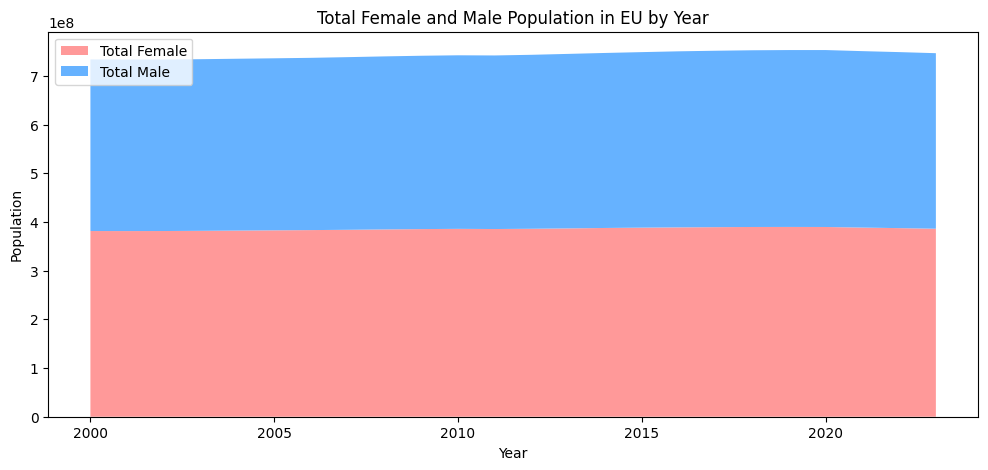

In [23]:
total_female_by_year_eu = EU_df.groupby('Year')['Female Population'].sum()
total_male_by_year_eu = EU_df.groupby('Year')['Male Population'].sum()

plt.figure(figsize=(12,5))
colors_map = ['#FF9999', '#66B2FF']  # Light red and light blue
plt.stackplot(total_female_by_year_eu.index, total_female_by_year_eu, total_male_by_year_eu, 
              labels=['Total Female', 'Total Male'], colors=colors_map)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Total Female and Male Population in EU by Year')
plt.show()

- Asian Countries

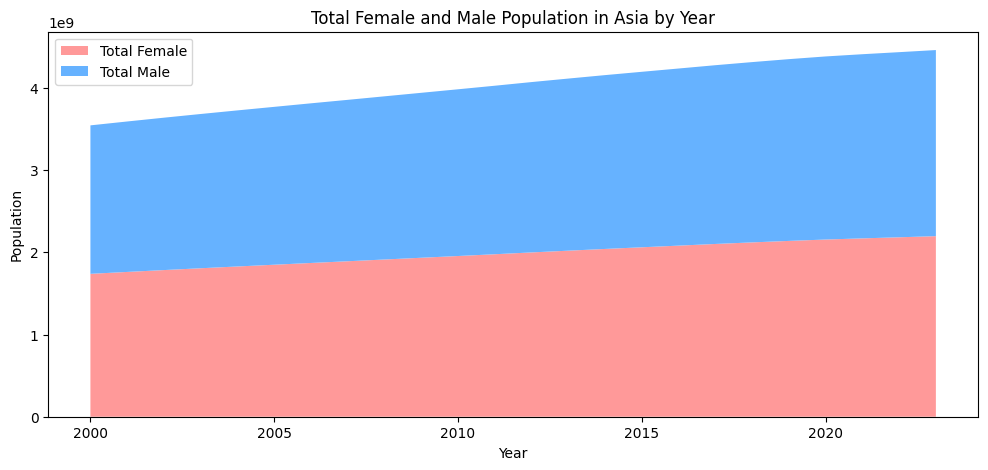

In [24]:
total_female_by_year_asia = Asia_df.groupby('Year')['Female Population'].sum()
total_male_by_year_asia= Asia_df.groupby('Year')['Male Population'].sum()

plt.figure(figsize=(12,5))
colors_map = ['#FF9999', '#66B2FF']  # Light red and light blue
plt.stackplot(total_female_by_year_eu.index, total_female_by_year_asia, total_male_by_year_asia, 
              labels=['Total Female', 'Total Male'], colors=colors_map)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Total Female and Male Population in Asia by Year')
plt.show()

1. **Population Size:**
    - Asia’s population is much larger than the EU’s. In 2000, Asia starts at 3.5 billion, while the EU is at 0.7 billion (700 million)—a factor of 5 difference.
    - By 2023, Asia reaches 4.5 billion, while the EU remains around 0.7 billion, showing Asia’s population is over 6 times larger.
2. **Growth Trends:**
    - Asia shows steady growth (+1 billion over 23 years), while the EU population remains stable with a slight peak and decline (700 million to 710 million, then back to 700 million).
    - Asia’s growth reflects younger demographics, higher fertility rates, and possibly less impact from aging populations compared to the EU.
3. **Gender Distribution:**
    - The EU has a balanced gender ratio (50% female, 50% male throughout).
    - Asia has a slight male bias (51% male vs. 49% female), which persists over time.
4. **Demographic Dynamics:**
    - The EU’s stability suggests an aging population with low fertility rates, offset by immigration and EU expansion until Brexit.
    - Asia’s growth indicates a younger population with higher fertility rates, though the slight male bias may reflect social factors like gender preference in certain regions.

#### Birth/Death Rate

For these features, we will calculate average rate by years and use line plots to visualize the trends.

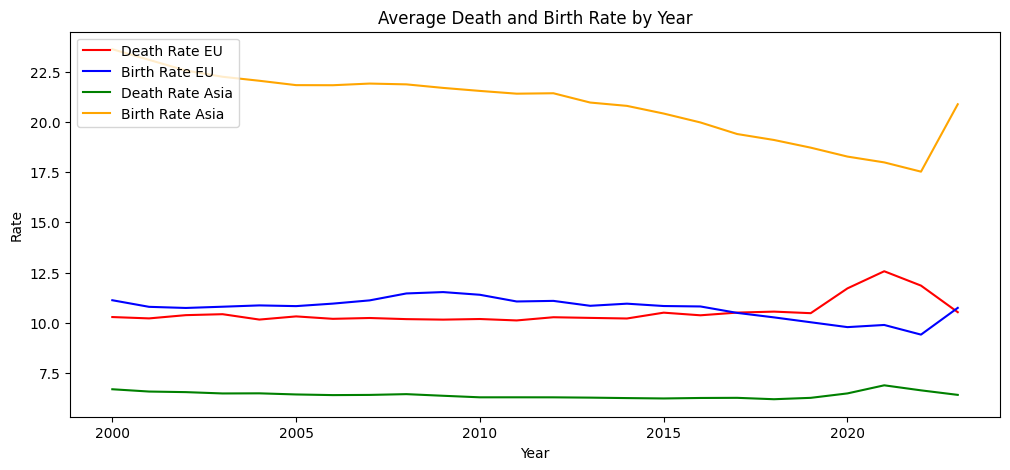

In [25]:
death_rate_avg_eu = EU_df.groupby('Year')['Death Rate'].mean()
birth_rate_avg_eu = EU_df.groupby('Year')['Birth Rate'].mean()
death_rate_avg_asia = Asia_df.groupby('Year')['Death Rate'].mean()
birth_rate_avg_asia = Asia_df.groupby('Year')['Birth Rate'].mean()

plt.figure(figsize=(12,5))
plt.plot(death_rate_avg_eu.index, death_rate_avg_eu, label='Death Rate EU', color='red')
plt.plot(birth_rate_avg_eu.index, birth_rate_avg_eu, label='Birth Rate EU', color='blue')
plt.plot(death_rate_avg_asia.index, death_rate_avg_asia, label='Death Rate Asia', color='green')
plt.plot(birth_rate_avg_asia.index, birth_rate_avg_asia, label='Birth Rate Asia', color='orange')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Average Death and Birth Rate by Year')
plt.show()


1. **EU:**
    - The birth and death rates are close, indicating near-zero natural population growth. The slight rise in the death rate post-2015 (possibly due to aging or the COVID-19 pandemic) and the stable-to-declining birth rate suggest a shrinking or stagnating population, aligning with the EU chart’s stability.
    - The gap between birth and death rates narrows over time, with a notable divergence after 2020, reflecting increased mortality or decreased fertility.
2. **Asia:**
    - The birth rate starts high and declines until 2015, reflecting demographic transitions in countries like China (one-child policy) and India (family planning). The rise post-2015 suggests a rebound, possibly due to policy shifts or higher fertility in growing regions.
    - The death rate remains low and stable, consistent with a younger population, supporting sustained population growth.
3. **Comparison:**
    - Asia’s birth rate (17.5–20) is significantly higher than the EU’s (10–11.5), while Asia’s death rate (6–7.5) is lower than the EU’s (10–12.5). This large gap drives Asia’s population growth versus the EU’s stability.
    - The EU’s aging population is evident in the rising death rate, while Asia’s younger demographic is reflected in the low, stable death rate.

#### Compulsory Education Duration	 

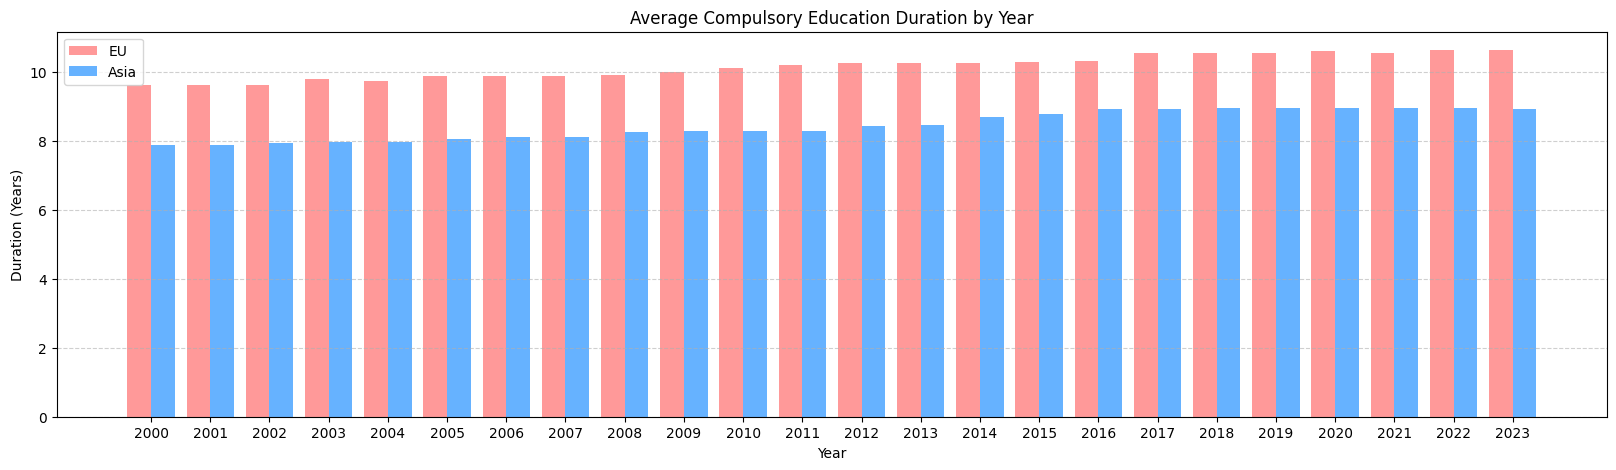

In [26]:
compulsory_edu_avg_eu = EU_df.groupby('Year')['Compulsory Education Dur.'].mean()
compulsory_edu_avg_asia = Asia_df.groupby('Year')['Compulsory Education Dur.'].mean()

bar_width = 0.4  # Adjust for spacing
years = np.array(compulsory_edu_avg_eu.index)  # Convert index to NumPy array
years_shifted = years + bar_width  # Shift Asia bars to the right

plt.figure(figsize=(20, 5))

plt.bar(years, compulsory_edu_avg_eu, width=bar_width, label='EU', color='#FF9999', align='center')
plt.bar(years_shifted, compulsory_edu_avg_asia, width=bar_width, label='Asia', color='#66B2FF', align='center')

plt.xlabel('Year')
plt.ylabel('Duration (Years)')
plt.title('Average Compulsory Education Duration by Year')
plt.xticks(years + bar_width / 2, years)  
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

1. **EU Education System:**
    - The stable 9–10 year duration reflects a mature system where compulsory education typically includes primary (6–7 years) and lower secondary (3–4 years) levels, with some countries (e.g., Germany, France) extending it further.
    - The slight increase could be due to reforms extending compulsory education to age 16–18 in some nations.
2. **Asia’s Educational Progress:**
    - The 8–9 year duration reflects a mix of advanced systems (e.g., Japan: 9 years, South Korea: 9 years) and developing ones (e.g., India: 8 years post-2009, some rural areas less).
    - The upward trend may result from policy initiatives, urbanization, and economic growth, particularly in East Asia (China, South Korea) and Southeast Asia.
3. **Regional Disparities:**
    - The EU’s uniformity (due to standardized policies across member states) contrasts with Asia’s diversity, where averages mask significant variation (e.g., high durations in East Asia vs. lower in South Asia).

#### Employment Features
- Since these features are in % and sum of them will be 100% therefore, we will use stacked bar chart to visualize the percentage of each accounting for by year.

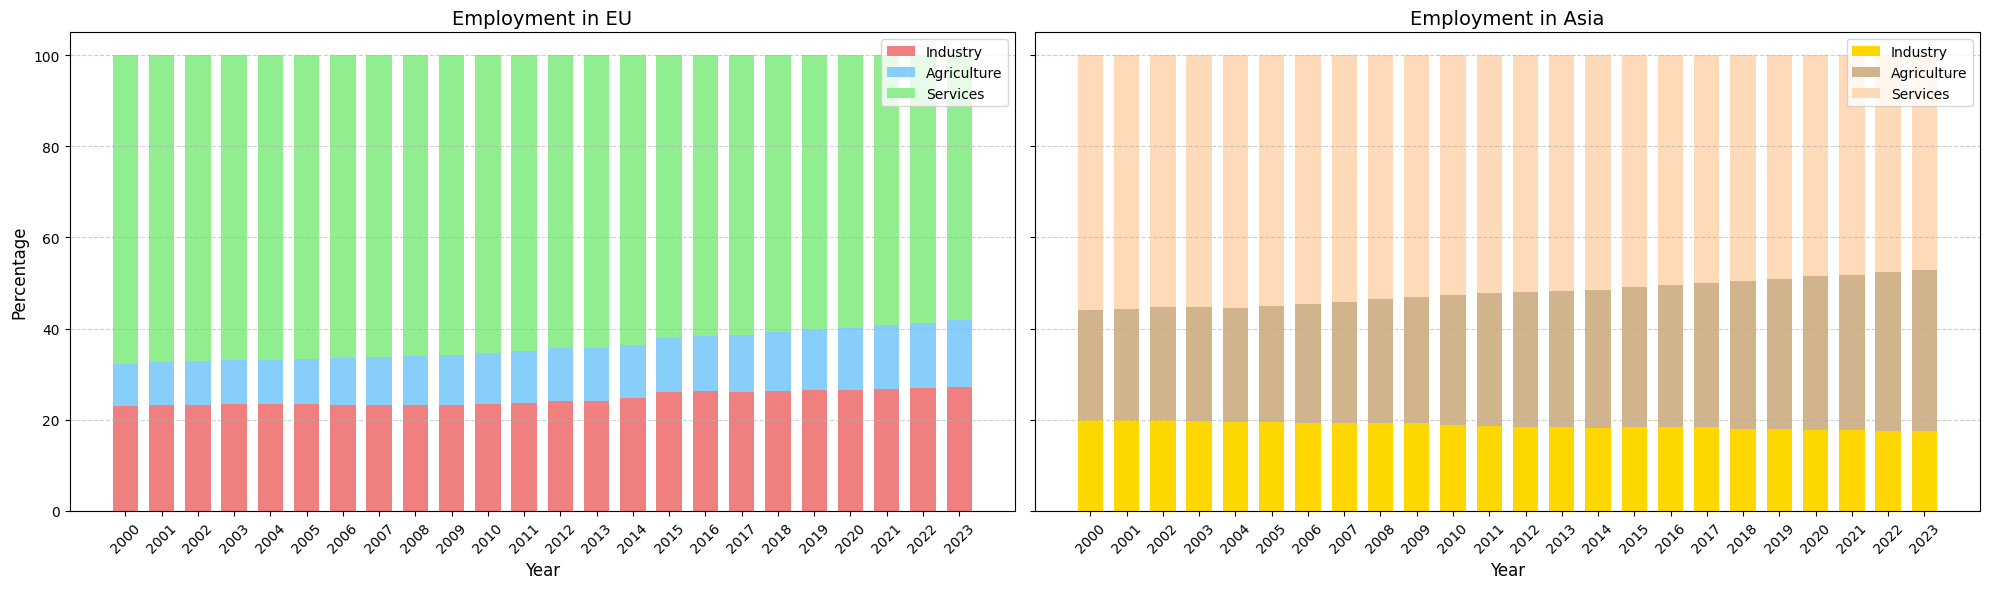

In [55]:
avg_percentages_eu_by_year = EU_df.groupby('Year')[cols_1].mean()
avg_percentages_asia_by_year = Asia_df.groupby('Year')[cols_1].mean()

bar_width = 0.7
years = np.array(EU_df['Year'].unique())

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)  # Share y-axis for comparison

axes[0].bar(years, avg_percentages_eu_by_year['Employment in Industry(%)'], width=bar_width, label='Industry', color='lightcoral')
axes[0].bar(years, avg_percentages_eu_by_year['Employment in Agriculture(%)'], width=bar_width, label='Agriculture', color='lightskyblue', 
            bottom=avg_percentages_eu_by_year['Employment in Industry(%)'])
axes[0].bar(years, avg_percentages_eu_by_year['Employment in Services(%)'], width=bar_width, label='Services', color='lightgreen', 
            bottom=avg_percentages_eu_by_year['Employment in Industry(%)'] + avg_percentages_eu_by_year['Employment in Agriculture(%)'])

axes[0].set_title('Employment in EU', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_xticks(years)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', linestyle="--", alpha=0.6)

axes[1].bar(years, avg_percentages_asia_by_year['Employment in Industry(%)'], width=bar_width, label='Industry', color='gold')
axes[1].bar(years, avg_percentages_asia_by_year['Employment in Agriculture(%)'], width=bar_width, label='Agriculture', color='tan',
            bottom=avg_percentages_asia_by_year['Employment in Industry(%)'])
axes[1].bar(years, avg_percentages_asia_by_year['Employment in Services(%)'], width=bar_width, label='Services', color='peachpuff',
            bottom=avg_percentages_asia_by_year['Employment in Industry(%)'] + avg_percentages_asia_by_year['Employment in Agriculture(%)'])

axes[1].set_title('Employment in Asia', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_xticks(years)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()

plt.show()

1. **Sectoral Composition:**
    - **Services**: The EU starts and ends with a higher services share (70% to 80%) compared to Asia (30% to 50%), reflecting the EU’s advanced economic stage versus Asia’s transitional phase.
    - **Industry**: Asia’s industry share (20%–25%) is higher than the EU’s (15%–25%), indicating Asia’s role as a manufacturing hub, though the EU’s decline suggests a shift away from this sector.
    - **Agriculture**: Asia’s agriculture share (50% to 30%) is much higher than the EU’s (5% to 3%), highlighting Asia’s agrarian base and the EU’s mechanized, urbanized economy.
2. **Trends:**
    - The EU shows a mature, service-driven economy with declining traditional sectors, while Asia shows a dynamic shift from agriculture to services and industry, consistent with economic development theories (e.g., Lewis model of structural transformation).
    - The EU’s stability contrasts with Asia’s rapid change, aligning with demographic data (EU’s aging population vs. Asia’s youthful growth).
3. **Economic Implications:**
    - The EU’s high services share supports high GDP per capita and education levels (9–10 years compulsory education), while Asia’s growing services and industrial sectors drive its economic expansion and population growth.

#### Gender Employment
- Since the there are only 2 genders over the years, we chose to use line graph for better visualization .

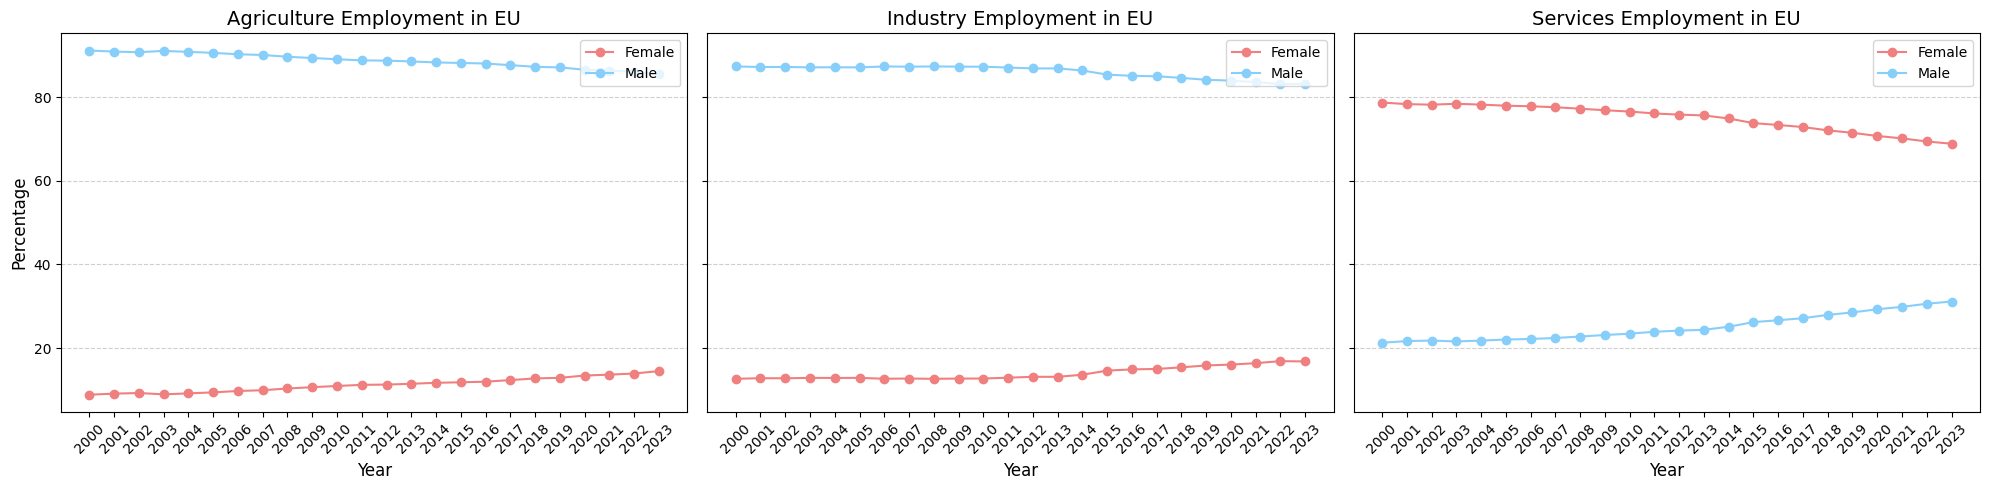

In [ ]:
female_cols = ['Female Employment in Agriculture(%)', 'Female Employment in Industry(%)', 'Female Employment in Services(%)']
avg_percentages_asia_female_by_year = Asia_df.groupby('Year')[female_cols].mean()
avg_percentages_eu_female_by_year = EU_df.groupby('Year')[female_cols].mean()  
avg_percentages_asia_female_by_year['Male Employment in Agriculture(%)'] = 100 - avg_percentages_asia_female_by_year['Female Employment in Agriculture(%)']
avg_percentages_asia_female_by_year['Male Employment in Industry(%)'] = 100 - avg_percentages_asia_female_by_year['Female Employment in Industry(%)']
avg_percentages_asia_female_by_year['Male Employment in Services(%)'] = 100 - avg_percentages_asia_female_by_year['Female Employment in Services(%)']

avg_percentages_eu_female_by_year['Male Employment in Agriculture(%)'] = 100 - avg_percentages_eu_female_by_year['Female Employment in Agriculture(%)']
avg_percentages_eu_female_by_year['Male Employment in Industry(%)'] = 100 - avg_percentages_eu_female_by_year['Female Employment in Industry(%)']
avg_percentages_eu_female_by_year['Male Employment in Services(%)'] = 100 - avg_percentages_eu_female_by_year['Female Employment in Services(%)']

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)  # 1 rows, 3 columns

years_eu = np.array(EU_df['Year'].unique())
years_asia = np.array(Asia_df['Year'].unique())

# EU - Agriculture
axes[0].plot(years_eu, avg_percentages_eu_female_by_year['Female Employment in Agriculture(%)'], label='Female', color='lightcoral', marker='o')
axes[0].plot(years_eu, avg_percentages_eu_female_by_year['Male Employment in Agriculture(%)'], label='Male', color='lightskyblue', marker='o')
axes[0].set_title('Agriculture Employment in EU', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_xticks(years_eu)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', linestyle="--", alpha=0.6)

# EU - Industry
axes[1].plot(years_eu, avg_percentages_eu_female_by_year['Female Employment in Industry(%)'], label='Female', color='lightcoral', marker='o')
axes[1].plot(years_eu, avg_percentages_eu_female_by_year['Male Employment in Industry(%)'], label='Male', color='lightskyblue', marker='o')
axes[1].set_title('Industry Employment in EU', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_xticks(years_eu)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', linestyle="--", alpha=0.6)

# EU - Services
axes[2].plot(years_eu, avg_percentages_eu_female_by_year['Female Employment in Services(%)'], label='Female', color='lightcoral', marker='o')
axes[2].plot(years_eu, avg_percentages_eu_female_by_year['Male Employment in Services(%)'], label='Male', color='lightskyblue', marker='o')
axes[2].set_title('Services Employment in EU', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_xticks(years_eu)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(loc='upper right')
axes[2].grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

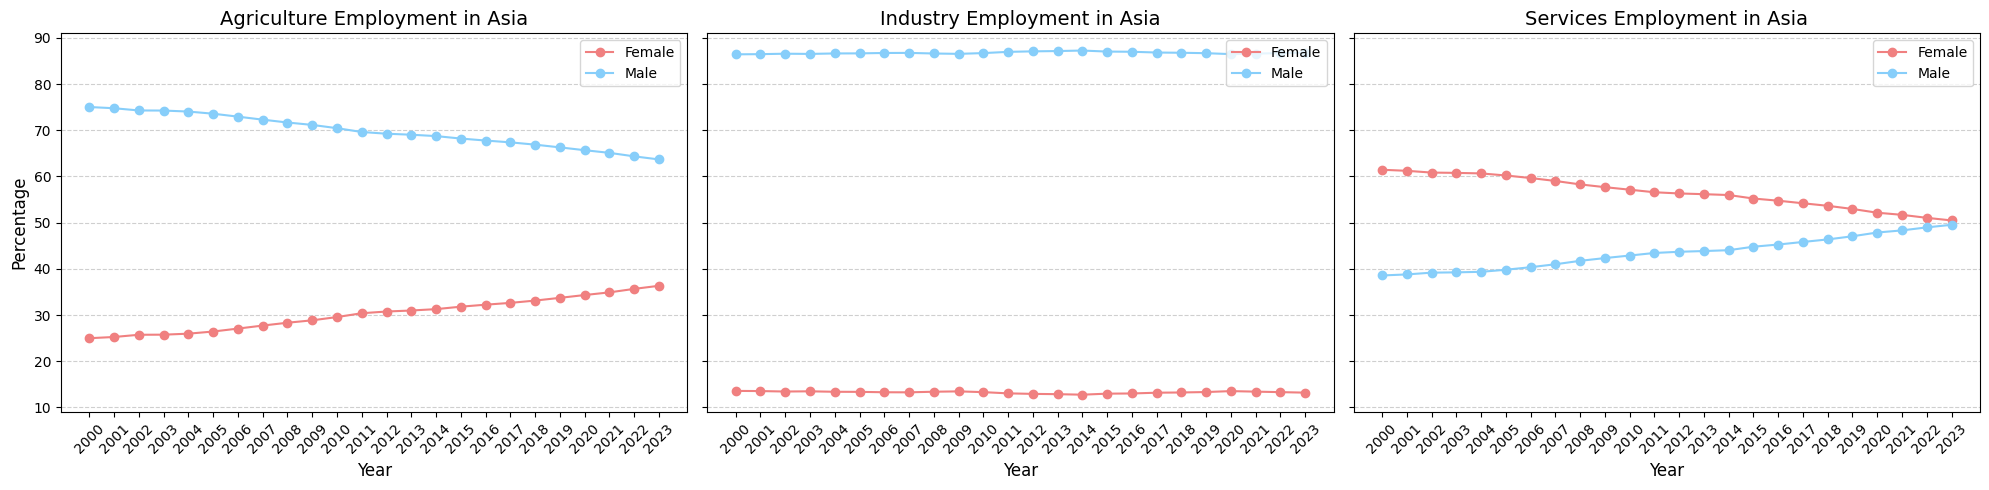

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)  # 1 row, 3 columns

# ASIA - Agriculture
axes[0].plot(years_asia, avg_percentages_asia_female_by_year['Female Employment in Agriculture(%)'], label='Female', color='lightcoral', marker='o')
axes[0].plot(years_asia, avg_percentages_asia_female_by_year['Male Employment in Agriculture(%)'], label='Male', color='lightskyblue', marker='o')
axes[0].set_title('Agriculture Employment in Asia', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_xticks(years_asia)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', linestyle="--", alpha=0.6)

# ASIA - Industry
axes[1].plot(years_asia, avg_percentages_asia_female_by_year['Female Employment in Industry(%)'], label='Female', color='lightcoral', marker='o')
axes[1].plot(years_asia, avg_percentages_asia_female_by_year['Male Employment in Industry(%)'], label='Male', color='lightskyblue', marker='o')
axes[1].set_title('Industry Employment in Asia', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_xticks(years_asia)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', linestyle="--", alpha=0.6)

# ASIA - Services
axes[2].plot(years_asia, avg_percentages_asia_female_by_year['Female Employment in Services(%)'], label='Female', color='lightcoral', marker='o')
axes[2].plot(years_asia, avg_percentages_asia_female_by_year['Male Employment in Services(%)'], label='Male', color='lightskyblue', marker='o')
axes[2].set_title('Services Employment in Asia', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_xticks(years_asia)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(loc='upper right')
axes[2].grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

1. **EU:**
    - The stable male dominance in agriculture (80–85%) and industry (70–75%) suggests cultural or physical barriers, while the service shift (50% to 60% female) aligns with high education (9–10 years) and female-friendly jobs.
    - The aging population and low birth rates (10–11.5) support a service economy where women thrive.
2. **Asia:**
    - The decline in female agriculture employment (40% to 25%) reflects mechanization or migration to urban sectors, while industry (30% to 40%) and services (30% to 50%) growth shows female inclusion driven by economic development.
    - The younger population and higher birth rates (17.5–20) support a dynamic labor market with increasing female participation.
3. **Regional Contrast:**
    - The EU’s mature economy favors female service growth, while Asia’s developing economy sees broader gender shifts across sectors, aligning with its population growth (3.5–4.5 billion) and education rise (8–9 years).

#### Value Added Features
- We will visualize the same way to Employment.

In [44]:
EU_df['Agriculture value added(%)']

0       18.604177
1       19.699243
2       20.817787
3       21.371533
4       20.975442
          ...    
1003    11.465326
1004    11.637786
1005    14.083963
1006    15.742899
1007    16.347126
Name: Agriculture value added(%), Length: 1008, dtype: float64

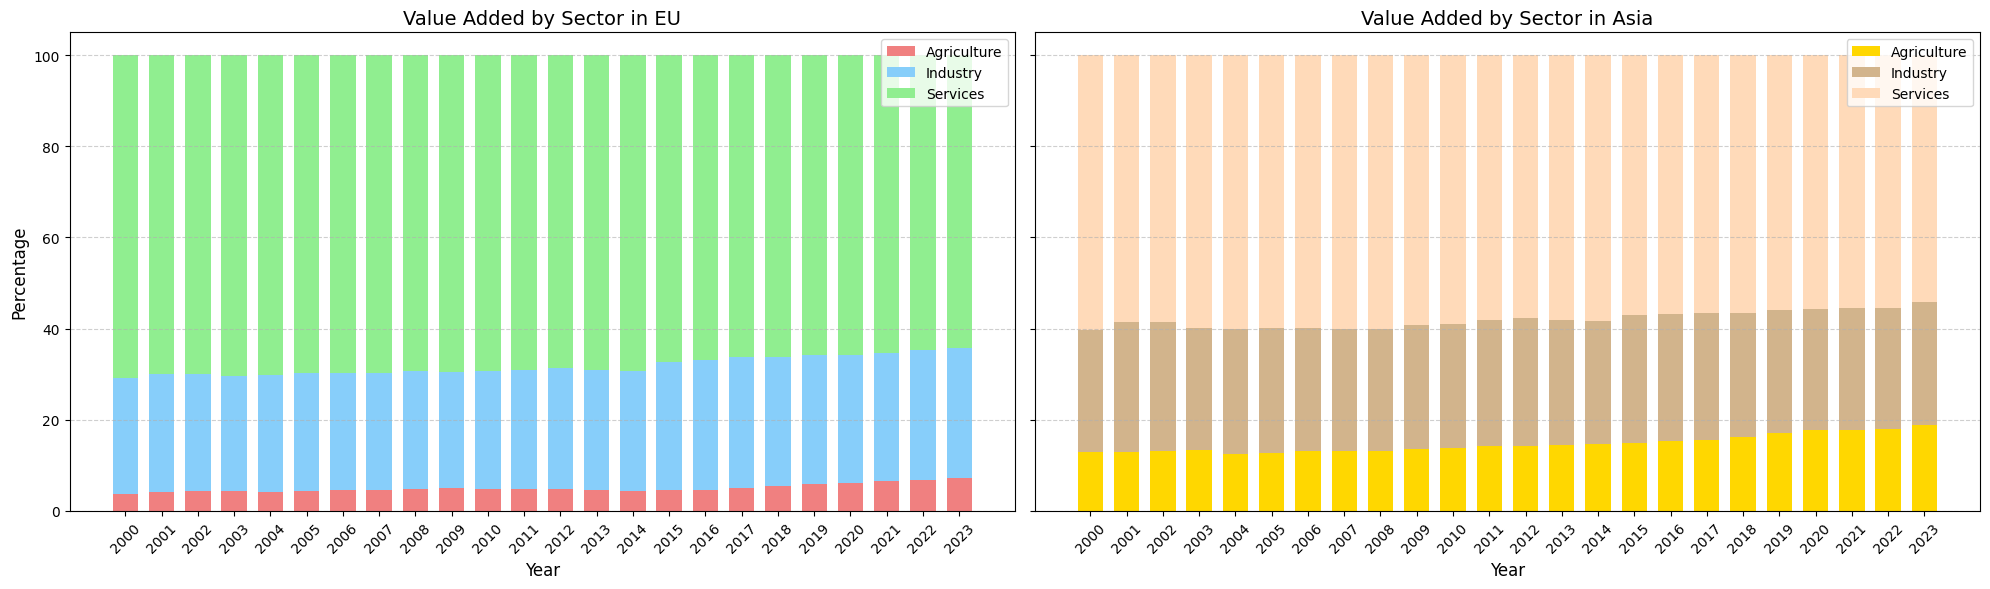

In [56]:
avg_percentages_eu_by_year = EU_df.groupby('Year')[['Agriculture value added(%)', 'Industry value added(%)', 'Services value added(%)']].mean()
avg_percentages_asia_by_year = Asia_df.groupby('Year')[['Agriculture value added(%)', 'Industry value added(%)', 'Services value added(%)']].mean()

bar_width = 0.7
years = np.array(EU_df['Year'].unique())

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)  # Share y-axis for comparison

# EU Value Added Plot
axes[0].bar(years, avg_percentages_eu_by_year['Agriculture value added(%)'], width=bar_width, label='Agriculture', color='lightcoral')
axes[0].bar(years, avg_percentages_eu_by_year['Industry value added(%)'], width=bar_width, label='Industry', color='lightskyblue', 
            bottom=avg_percentages_eu_by_year['Agriculture value added(%)'])
axes[0].bar(years, avg_percentages_eu_by_year['Services value added(%)'], width=bar_width, label='Services', color='lightgreen', 
            bottom=avg_percentages_eu_by_year['Agriculture value added(%)'] + avg_percentages_eu_by_year['Industry value added(%)'])

axes[0].set_title('Value Added by Sector in EU', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_xticks(years)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', linestyle="--", alpha=0.6)

# Asia Value Added Plot
axes[1].bar(years, avg_percentages_asia_by_year['Agriculture value added(%)'], width=bar_width, label='Agriculture', color='gold')
axes[1].bar(years, avg_percentages_asia_by_year['Industry value added(%)'], width=bar_width, label='Industry', color='tan',
            bottom=avg_percentages_asia_by_year['Agriculture value added(%)'])
axes[1].bar(years, avg_percentages_asia_by_year['Services value added(%)'], width=bar_width, label='Services', color='peachpuff',
            bottom=avg_percentages_asia_by_year['Agriculture value added(%)'] + avg_percentages_asia_by_year['Industry value added(%)'])

axes[1].set_title('Value Added by Sector in Asia', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_xticks(years)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


1. **EU:**
    - The service dominance (80%) reflects a knowledge-based economy, supported by high education and female employment (60% in services), contributing to high GDP per capita.
    - The decline in industry and agriculture’s value added suggests a focus on high-value sectors, with minimal economic reliance on traditional sectors.
2. **Asia:**
    - The rise in services (30% to 50%) and decline in agriculture (40% to 20%) mirror economic modernization, with productivity gains in agriculture due to mechanization.
    - Industry’s peak and decline (30% to 25%) reflect a maturing industrial base, possibly facing automation or competition, yet still significant compared to the EU.
3. **Regional Contrast:**
    - The EU’s post-industrial phase contrasts with Asia’s developing phase, explaining the EU’s focus on services and Asia’s balanced contributions, aligning with demographic and employment trends.